# Spectroscopic Case

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as pl
import glob

import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import numpy as np
%matplotlib inline
from tqdm import tqdm
from zbeamsfunctions import mu_w,likelihood,likelihood_spec
from mcmcfunctions import mcmc,mcmc_spec
from scipy.stats import truncnorm
import pandas as pd
from mcmcfunctions import mcmc_phot
from mcmcfunctions_SL import mcmc_SL
from zbeamsfunctions_SL import likelihood_SL,likelihood_spec_contam_SL,likelihood_phot_contam_SL,contour,r_SL

from Lenstronomy_Cosmology import Background, LensCosmo
from astropy.cosmology import LambdaCDM,FlatLambdaCDM,wCDM,FlatwCDM
import corner
import sys, importlib

try:importlib.reload(sys.modules['mcmcfunctions_SL'])
except Exception as ex: print(f'Cannot reload: {ex}')

In [18]:
zt,z_obs,z2,mu_t,mu_obs,cor_type,cor_z  = np.loadtxt('fakedata_spectroscopic.txt',unpack=True)

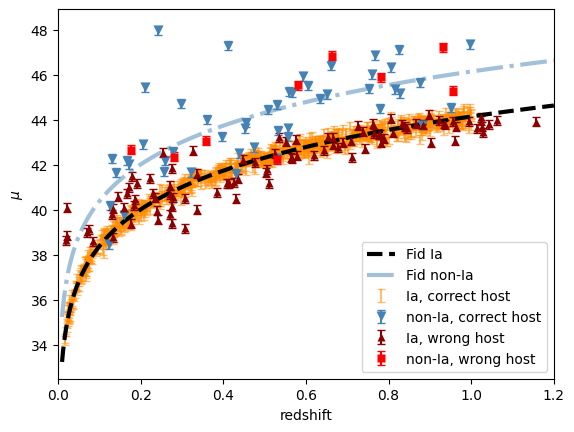

In [19]:
index_Ia = np.where((cor_type==1) & (cor_z==1))
index_nIa = np.where((cor_type==0) & (cor_z==1))
index_zIa = np.where((cor_type==1) & (cor_z==0))
index_znIa = np.where((cor_type==0) & (cor_z==0))

plt.errorbar(z_obs[index_Ia],mu_obs[index_Ia],yerr=0.2*np.ones(len(mu_obs[index_Ia])),
             marker='',ls='',color='darkorange', alpha=0.55,ms=7,capsize=3,
             label='Ia, correct host')
plt.errorbar(z_obs[index_nIa],mu_obs[index_nIa],yerr=0.2*np.ones(len(mu_obs[index_nIa])),
             marker='v',ls='',color='steelblue',markeredgecolor='none',ms=7,capsize=3,
             label='non-Ia, correct host')
plt.errorbar(z_obs[index_zIa],mu_obs[index_zIa],yerr=0.2*np.ones(len(mu_obs[index_zIa])),
             marker='^',ls='',color='darkred',markeredgecolor='none',ms=6,capsize=3,
             label='Ia, wrong host')
plt.errorbar(z_obs[index_znIa],mu_obs[index_znIa],yerr=0.2*np.ones(len(mu_obs[index_znIa])),
             marker='s',ls='',color='r',markeredgecolor='none',ms=6,capsize=3,
             label='non-Ia, wrong host')

z_vec = np.linspace(.01,1.2,1000)
mu_vec = np.vectorize(mu_w)
plt.plot(z_vec,mu_vec(z_vec,0.31,67.74,-1),'--k',lw=3,label='Fid Ia')
plt.plot(z_vec,mu_vec(z_vec,0.31,67.74,-1)+2,'-.',color='steelblue',lw=3,alpha=0.5,label='Fid non-Ia')

plt.xlabel('redshift')
plt.ylabel(r'$\mu$')
plt.legend()
plt.xlim([0,1.2])

plt.show()

In [20]:
#generating the unbiased mcmc chain

mcmc(50000,                          #number of steps
     likelihood,                     #which likelihood function to use
     'nobias',                       #bias: indicates the z dataset to use
     'nobias',                       #bias: indicates the mu dataset to use
     0.3,70,-1,                      #starting points (OMi,H0i,wi)
     0.0295,0.3965,0.0785,           #step sizes (omstep,H0step,wstep)
     'fakedata_spectroscopic.txt',   #input file (dataset)
     'chains/mcmc_chain_nobias.txt', #output file (chain)
     True)                           #show the statusbar 

Generating posterior
[(1000,), (1000,), (), (), (), ()]
[(1000,), (1000,), (), (), (), ()]
[                                                  ]0%[(1000,), (1000,), (), (), (), ()]
[                                                  ]0%[(1000,), (1000,), (), (), (), ()]
[                                                  ]0%[(1000,), (1000,), (), (), (), ()]
[                                                  ]0%[(1000,), (1000,), (), (), (), ()]
[                                                  ]0%[(1000,), (1000,), (), (), (), ()]
[                                                  ]0%[(1000,), (1000,), (), (), (), ()]
[                                                  ]0%

[(1000,), (1000,), (), (), (), ()]
[                                                  ]0%[(1000,), (1000,), (), (), (), ()]
[                                                  ]0%[(1000,), (1000,), (), (), (), ()]
[                                                  ]0%[(1000,), (1000,), (), (), (), ()]
[                                                  ]0%[(1000,), (1000,), (), (), (), ()]
[                                                  ]0%[(1000,), (1000,), (), (), (), ()]
[                                                  ]0%[(1000,), (1000,), (), (), (), ()]
[                                                  ]0%[(1000,), (1000,), (), (), (), ()]
[                                                  ]0%[(1000,), (1000,), (), (), (), ()]
[                                                  ]0%[(1000,), (1000,), (), (), (), ()]
[                                                  ]0%[(1000,), (1000,), (), (), (), ()]
[                                                  ]0%[(1000,), (1000,), ()

In [ ]:
r_obs_0

In [4]:
#zL_obs=db_in['zL_obs'];zS_obs=db_in['zS_obs'];r_obs=db_in['r_obs'];sigma_r_obs=db_in['sigma_r_obs'] #Making these up!!!

repeat_0=True

N_obs = 10
zL_obs_0 = []
zS_obs_0 = []
repeat_0=True
while repeat_0:
    #Have changed the means of these from (0.5,1) to (0.4,0.8).
    zL_obs_i = truncnorm(-2,np.inf,loc=0.4,scale = 0.2).rvs(size=10*N_obs)
    zS_obs_i = truncnorm(-2,np.inf,loc=0.8,scale=0.4).rvs(size=10*N_obs)
    valid_bool = zL_obs_i<zS_obs_i
    zL_obs_i=zL_obs_i[valid_bool]
    zS_obs_i=zS_obs_i[valid_bool]
    if len(zL_obs_i)>=N_obs:
        zL_obs_0 = zL_obs_i[0:N_obs]
        zS_obs_0 = zS_obs_i[0:N_obs]
        assert len(zL_obs_0)==N_obs;assert len(zS_obs_0)==N_obs
        repeat_0=False

Om_fid = 0.2;Ode_fid = 0.8;H0_fid = 70;w_fid = -1.0

cosmo_type = 'wCDM'
'''
NOTE: I think this may currently be incorrect - r_obs_0 should be measured from theta_E and vel_disp, rather than redshifts?
'''
if cosmo_type == 'wCDM': r_obs_0 = r_SL(zL_obs_0,zS_obs_0,wCDM(H0=H0_fid,Om0=Om_fid,Ode0=Ode_fid,w0=w_fid))
if cosmo_type == 'FlatwCDM': r_obs_0 = r_SL(zL_obs_0,zS_obs_0,FlatwCDM(H0=H0_fid,Om0=Om_fid,w0=w_fid))
if cosmo_type == 'LambdaCDM': r_obs_0 = r_SL(zL_obs_0,zS_obs_0,LambdaCDM(H0=H0_fid,Om0=Om_fid,Ode0=Ode_fid))
if cosmo_type == 'FlatLambdaCDM': r_obs_0 = r_SL(zL_obs_0,zS_obs_0,FlatLambdaCDM(H0=H0_fid,Om0=Om_fid))

#Breaking the measurements of r_obs if the object is contaminated:
p_tau_0 = [np.random.choice([1.0,0.95]) for i in range(len(r_obs_0))]
contaminated_bool_0 = [np.random.choice([0,1],p=[p_tau_0[i],1-p_tau_0[i]]) for i in range(len(r_obs_0))] #Lens = 0
r_obs_0_contam = [r_obs_0[i] if contaminated_bool_0[i] == 0 else np.random.random() for i in range(len(r_obs_0))]

'''
Not sure what sigma_r_obs_0 should be if the object is not a lens?
'''

sigma_r_obs_0 = abs(0.01*r_obs_0)

db_in = pd.DataFrame({'zL_obs':zL_obs_0,'zS_obs':zS_obs_0,
                    'sigma_zL_obs':0.01,'sigma_zS_obs':0.01,
                    'r_obs':r_obs_0,'r_obs_contam': r_obs_0_contam,
                    'sigma_r_obs':sigma_r_obs_0,'P_tau':p_tau_0,'FP_bool':contaminated_bool_0})
#db_in.head(10)
db_in.describe()

,zL_obs,zS_obs,sigma_zL_obs,sigma_zS_obs,r_obs,r_obs_contam,sigma_r_obs,P_tau,FP_bool
count,10.000000,10.000000,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.0
mean,0.257524,1.077522,1.000000e-02,1.000000e-02,0.702052,0.702052,0.007021,0.965000,0.0
std,0.209307,0.415649,1.828559e-18,1.828559e-18,0.234196,0.234196,0.002342,0.024152,0.0
min,0.028174,0.559977,1.000000e-02,1.000000e-02,0.268291,0.268291,0.002683,0.950000,0.0
25%,0.099290,0.774589,1.000000e-02,1.000000e-02,0.569814,0.569814,0.005698,0.950000,0.0
50%,0.188355,0.964470,1.000000e-02,1.000000e-02,0.685998,0.685998,0.006860,0.950000,0.0
75%,0.441355,1.333823,1.000000e-02,1.000000e-02,0.917989,0.917989,0.009180,0.987500,0.0
max,0.600340,1.832678,1.000000e-02,1.000000e-02,0.964739,0.964739,0.009647,1.000000,0.0


In [ ]:
zL_err = [0.99,1.01]
zS_err = [0.99,1.01]
'''
r_obs_c_err = r_SL(
        zL_obs_0*np.random.uniform(low=zL_err[0],high=zL_err[1],size=len(zL_obs_0)),
        zS_obs_0*np.random.uniform(low=zS_err[0],high=zS_err[1],size=len(zL_obs_0)),
        wCDM(H0=H0_fid,Om0=Om_fid,Ode0=Ode_fid,w0=w_fid))'''

'\nr_obs_c_err = r_SL(\n        zL_obs_0*np.random.uniform(low=zL_err[0],high=zL_err[1],size=len(zL_obs_0)),\n        zS_obs_0*np.random.uniform(low=zS_err[0],high=zS_err[1],size=len(zL_obs_0)),\n        wCDM(H0=H0_fid,Om0=Om_fid,Ode0=Ode_fid,w0=w_fid))'

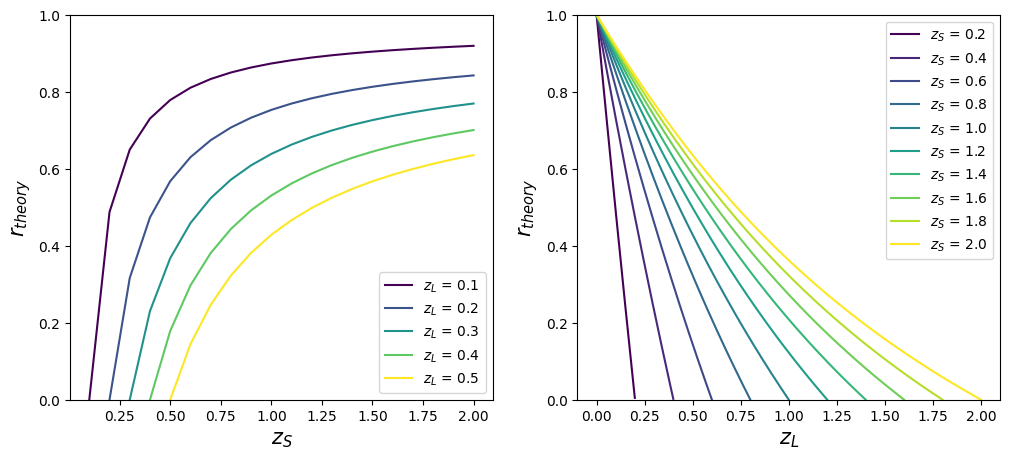

In [ ]:
#Pick some zL values:
zL_list_0 = np.round(np.arange(0.1,0.6,0.1),2)
#Choose range of zS to go with each one:
zS_list_0 = [np.arange(zL_i,2.1,0.1) for zL_i in zL_list_0]
#Calculate corresponding theoretical r value:
r_theory_list_0 = [r_SL(zL_list_0[i],zS_list_0[i],wCDM(H0=70,Om0=0.3,Ode0=0.7,w0=-1)) for i in range(len(zL_list_0))]
color_list_0 = pl.cm.viridis(np.linspace(0,1,len(zL_list_0)))

#Pick some zL values:
zS_list_1 = np.round(np.arange(0.2,2.2,0.2),2)
#Choose range of zL values to go with each one:
zL_list_1 = [np.arange(0,zS_i,0.001) for zS_i in zS_list_1]
#Calculate theoretical corresponding r value:
r_theory_list_1 = [r_SL(zL_list_1[i],zS_list_1[i],wCDM(H0=70,Om0=0.3,Ode0=0.7,w0=-1)) for i in range(len(zL_list_1))]
color_list_1 = pl.cm.viridis(np.linspace(0,1,len(zS_list_1)))

#Plot variation in r:
fig,ax = pl.subplots(1,2,figsize=(12,5))
for c_i in range(len(zL_list_0)):
    ax[0].plot(zS_list_0[c_i],r_theory_list_0[c_i],c=color_list_0[c_i])
for c_i in range(len(zS_list_1)):
    ax[1].plot(zL_list_1[c_i],r_theory_list_1[c_i],c=color_list_1[c_i])

ax[0].legend([f'$z_L$ = {zL_i}' for zL_i in  zL_list_0])
ax[1].legend([f'$z_S$ = {zS_i}' for zS_i in  zS_list_1])

ax[0].set_xlabel('$z_S$',fontsize=15)
ax[1].set_xlabel('$z_L$',fontsize=15)
for i in range(2):
    ax[i].set_ylabel('$r_{theory}$',fontsize=15)
    ax[i].set_ylim(0,1)

pl.show()

'''Takeaways: 
- Large variation in r if zL is unknown. If zL is uncertain, could explain many values of r within the uncertainty,
without resorting to constraining the cosmology.
- Large variation in r if zS is small and unknown, but smaller variation if zS is larger. If zS is uncertain but large, will get
smaller uncertainty in the theoretical value of r_theory, allowing more constraining power on the cosmology.
  '''

In [5]:
['FlatLambdaCDM','LambdaCDM','FlatwCDM','wCDM']

contaminated = True;photometric = True
if not contaminated: likelihood = likelihood_SL
else: 
     if not photometric: likelihood = likelihood_spec_contam_SL
     if photometric: likelihood = likelihood_phot_contam_SL
mcmc_SL(
     n = 1000,n_walkers = int(2*(12+2*len(db_in))),
     likelihood = likelihood,
     zbias = 'bias',
     mubias = 'bias',
     OMi = 0.3,
     Odei = 0.7,
     H0i = 70,
     wi = -1,
     omstep = 0.01,
     ode_step = 0.01,
     H0step = 1,
     wstep = 0.01,
     db_in = db_in, #input file (dataset)
     fileout = 'chains/SL_orig',
     status = True,
     cosmo_type = cosmo_type,
     contaminated = contaminated,
     photometric = photometric)

#Would be good to have a code which seemlessly went from spectroscopic to photometric (or vice versa?) Not sure if 
#this is possible. May need to remove assertion in likelihood function.

Assuming the sample is contaminated, and that the redshifts are photometric
Allowing the cosmology to have non-zero curvature
Assuming Non-trivial DE EoS


/Users/hollowayp/zBEAMS/zbeamsfunctions_SL.py:133: RuntimeWarning: divide by zero encountered in log
  L_tot = np.sum(np.log(likelihood_i))
/Users/hollowayp/zBEAMS/zbeamsfunctions_SL.py:133: RuntimeWarning: divide by zero encountered in log
  L_tot = np.sum(np.log(likelihood_i))
/Users/hollowayp/zBEAMS/zbeamsfunctions_SL.py:133: RuntimeWarning: divide by zero encountered in log
  L_tot = np.sum(np.log(likelihood_i))
/Users/hollowayp/zBEAMS/zbeamsfunctions_SL.py:133: RuntimeWarning: divide by zero encountered in log
  L_tot = np.sum(np.log(likelihood_i))
/Users/hollowayp/zBEAMS/zbeamsfunctions_SL.py:133: RuntimeWarning: divide by zero encountered in log
  L_tot = np.sum(np.log(likelihood_i))
/Users/hollowayp/zBEAMS/zbeamsfunctions_SL.py:133: RuntimeWarning: divide by zero encountered in log
  L_tot = np.sum(np.log(likelihood_i))
/Users/hollowayp/zBEAMS/zbeamsfunctions_SL.py:133: RuntimeWarning: divide by zero encountered in log
  L_tot = np.sum(np.log(likelihood_i))


Zero likelihood
Zero likelihood
Zero likelihood
Zero likelihood
Zero likelihood
Zero likelihood
Zero likelihood
Zero likelihood
Zero likelihood
Zero likelihood
Zero likelihood
Zero likelihood
Zero likelihood
Zero likelihood


  0%|          | 0/1000 [00:00<?, ?it/s]

Outside OD bound


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  0%|          | 1/1000 [00:00<02:16,  7.30it/s]

Outside OM bound
Outside OD bound
Outside W0 bound
Outside W0 bound
Outside OM bound
Outside W0 bound
Outside OM bound
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Zero likelihood
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM boundRedshift population priors below zero

Redshift population priors below zero
Outside OM boundOutside OD bound

Outside W0 bound
Outside OM bound
Outside OD bound
Outside W0 bound
Outside W0 bound
Outside OD bound
Outside W0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outsi

  0%|          | 2/1000 [00:00<02:07,  7.84it/s]/Users/hollowayp/zBEAMS/zbeamsfunctions_SL.py:133: RuntimeWarning: divide by zero encountered in log
  L_tot = np.sum(np.log(likelihood_i))
  0%|          | 3/1000 [00:00<02:18,  7.18it/s]

Outside W0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Outside W0 bound
Outside OD bound
Zero likelihood
Zero likelihood
Zero likelihood
Outside W0 bound
Outside OM bound
Outside OM boundRedshift population priors below zero

Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Zero likelihood
Zero likelihood
Zero likelihood
Zero likelihood
Zero likelihood
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside W0 bound
Outside OM bound


  0%|          | 4/1000 [00:00<02:15,  7.34it/s]

Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside W0 bound
Zero likelihood
Zero likelihood
Zero likelihood
Zero likelihood
Zero likelihood
Redshift population priors below zero
Redshift population priors below zero
Outside OM boundRedshift population priors below zero

Outside OD bound
Outside W0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Zero likelihood
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside W0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Zero likelihood
Redshift population priors below zero
Redshift population priors below zero


  0%|          | 5/1000 [00:00<02:08,  7.72it/s]

Zero likelihood
Zero likelihood
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside W0 bound


  1%|          | 6/1000 [00:00<02:08,  7.71it/s]

Outside OM bound
Outside W0 bound
Zero likelihood
Outside W0 bound
Redshift population priors below zero
Zero likelihood
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Zero likelihood


  1%|          | 7/1000 [00:00<02:27,  6.71it/s]

Outside OM bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside W0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Zero likelihood
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside W0 bound
Zero likelihood
Redshift population priors below zero
Outside OM bound
Outside OD bound


  1%|          | 8/1000 [00:01<02:27,  6.71it/s]

Zero likelihood
Outside OM bound
Outside W0 bound
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Zero likelihood
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Outside OD bound
Outside OM bound


  1%|          | 9/1000 [00:01<02:53,  5.72it/s]

Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Zero likelihood
Outside W0 bound
Outside OM bound
Zero likelihood
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Zero likelihood


  1%|          | 11/1000 [00:01<02:42,  6.08it/s]

Outside W0 bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Zero likelihood
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Zero likelihood
Outside OM bound
Zero likelihood


  1%|          | 12/1000 [00:01<02:28,  6.64it/s]

Outside OM bound
Redshift population priors below zero
Redshift population priors below zeroRedshift population priors below zero

Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Zero likelihood
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Zero likelihood
Redshift population priors below zero
Redshift population priors below zero


  1%|▏         | 14/1000 [00:02<02:35,  6.34it/s]

Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside W0 bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Zero likelihood
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Zero likelihood
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound


  2%|▏         | 15/1000 [00:02<02:29,  6.59it/s]

Outside OM bound
Outside W0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound


  2%|▏         | 16/1000 [00:02<02:42,  6.04it/s]

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Outside OM bound
Outside W0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound


  2%|▏         | 18/1000 [00:02<02:34,  6.34it/s]

Outside OM bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside W0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Zero likelihood
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors 

  2%|▏         | 19/1000 [00:02<02:41,  6.06it/s]

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Redshift population priors below zeroRedshift population priors below zero

Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zer

  2%|▏         | 21/1000 [00:03<02:24,  6.79it/s]

Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors 

  2%|▏         | 23/1000 [00:03<02:12,  7.38it/s]

Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound


  2%|▏         | 24/1000 [00:03<02:08,  7.59it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM boundRedshift population priors below zero

Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors belo

  3%|▎         | 26/1000 [00:03<02:07,  7.67it/s]

Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside W0 bound
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero


  3%|▎         | 28/1000 [00:04<02:03,  7.89it/s]

Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
R

  3%|▎         | 29/1000 [00:04<02:03,  7.88it/s]

Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside W0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redsh

  3%|▎         | 31/1000 [00:04<02:11,  7.34it/s]

Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zeroOutside OM bound

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Ou

  3%|▎         | 33/1000 [00:04<01:56,  8.30it/s]

Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outsid

  4%|▎         | 35/1000 [00:04<01:55,  8.33it/s]

Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Zero likelihood
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Re

  4%|▎         | 37/1000 [00:05<01:58,  8.13it/s]

Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zeroOutside OM bound

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zeroRedshift population priors below zero

Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors belo

  4%|▍         | 38/1000 [00:05<01:55,  8.33it/s]

Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero


  4%|▍         | 39/1000 [00:05<02:38,  6.05it/s]

Redshift population priors below zero
Outside OD bound
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside W0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside

  4%|▍         | 41/1000 [00:05<02:16,  7.03it/s]

Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero

  4%|▍         | 43/1000 [00:06<02:00,  7.96it/s]

Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside W0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside O

  4%|▍         | 45/1000 [00:06<01:49,  8.76it/s]

Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside W0 bound
Outside OD bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside

  5%|▍         | 47/1000 [00:06<01:48,  8.78it/s]

Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population pr

  5%|▍         | 49/1000 [00:06<01:45,  9.00it/s]

Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 boundOutside OD bound

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors belo

  5%|▌         | 51/1000 [00:06<01:51,  8.54it/s]

Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound


  5%|▌         | 53/1000 [00:07<01:46,  8.92it/s]

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside W0 bound
Outside OD bound
Redshift p

  6%|▌         | 55/1000 [00:07<01:44,  9.04it/s]

Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside O

  6%|▌         | 56/1000 [00:07<01:44,  9.02it/s]

Outside OM bound
Redshift population priors below zero
Outside W0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside W0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outsi

  6%|▌         | 58/1000 [00:07<01:35,  9.87it/s]

Outside OM bound
Redshift population priors below zero
Outside OM boundOutside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound

Redshift population priors below zeroOutside OD bound

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
R

  6%|▌         | 61/1000 [00:08<01:37,  9.63it/s]

Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zeroOutsid

  6%|▋         | 63/1000 [00:08<01:37,  9.61it/s]

Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below

  6%|▋         | 64/1000 [00:08<01:38,  9.49it/s]

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside W0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside W0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors

  7%|▋         | 66/1000 [00:08<01:30, 10.27it/s]

Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Redshift popu

  7%|▋         | 68/1000 [00:08<01:41,  9.16it/s]

Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zeroOutside OM bound

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound


  7%|▋         | 69/1000 [00:08<01:43,  9.03it/s]

Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Redshift populatio

  7%|▋         | 72/1000 [00:09<01:43,  8.98it/s]

Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 boundOutside OM bound

Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound


  7%|▋         | 74/1000 [00:09<01:42,  9.05it/s]

Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM boundOutside OM bound

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside W0 bound
Redshift population prio

  8%|▊         | 76/1000 [00:09<01:37,  9.45it/s]

Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outs

  8%|▊         | 77/1000 [00:09<01:38,  9.33it/s]

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors 

  8%|▊         | 79/1000 [00:09<01:35,  9.66it/s]

Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound


  8%|▊         | 80/1000 [00:10<02:17,  6.67it/s]

Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift p

  8%|▊         | 81/1000 [00:10<02:10,  7.04it/s]

Outside OD bound
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
O

  8%|▊         | 84/1000 [00:10<01:52,  8.13it/s]

Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift p

  9%|▊         | 86/1000 [00:10<01:41,  8.97it/s]

Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift popul

  9%|▉         | 89/1000 [00:11<01:36,  9.49it/s]

Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
O

  9%|▉         | 91/1000 [00:11<01:38,  9.23it/s]

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside W0 bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below ze

  9%|▉         | 92/1000 [00:11<01:41,  8.94it/s]

Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
R

  9%|▉         | 94/1000 [00:11<01:46,  8.50it/s]

Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zeroOutside OM bound

Outside OD bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors below ze

 10%|▉         | 96/1000 [00:11<01:42,  8.81it/s]

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM boundRedshift population priors below zero
Outside OM bound

Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM boundRedshift population priors below zero

Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below ze

 10%|▉         | 98/1000 [00:12<01:31,  9.88it/s]

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside W0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zeroOutside OM bound

Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Redshift 

 10%|▉         | 99/1000 [00:12<02:17,  6.57it/s]

Outside OD bound
Redshift population priors below zero
Redshift population priors below zeroRedshift population priors below zero

Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound

 10%|█         | 100/1000 [00:12<03:09,  4.75it/s]


Outside OM bound
Outside OD bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OD bound


 10%|█         | 101/1000 [00:13<03:27,  4.33it/s]

Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero


 10%|█         | 102/1000 [00:13<03:46,  3.97it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below ze

 10%|█         | 103/1000 [00:13<04:12,  3.56it/s]

Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside W0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM boundOutside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound

Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound


 10%|█         | 104/1000 [00:14<04:02,  3.69it/s]

Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero


 10%|█         | 105/1000 [00:14<04:18,  3.47it/s]

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM boundOutside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero


 11%|█         | 106/1000 [00:14<03:59,  3.73it/s]


Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors belo

 11%|█         | 107/1000 [00:14<04:08,  3.59it/s]

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound


 11%|█         | 108/1000 [00:15<04:28,  3.32it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors belo

 11%|█         | 110/1000 [00:15<03:34,  4.15it/s]

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zeroOutside OM bound

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bou

 11%|█         | 111/1000 [00:15<03:28,  4.27it/s]

Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside W0 bound


 11%|█         | 112/1000 [00:15<03:05,  4.77it/s]

Outside OM bound
Outside OD bound
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM boundOutside H0 bound

Outside OM bound
Outside OM bound
Outside H0 boundRedshift population priors below zero
Outside OM bound
Redshift population priors below zero

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift popul

 11%|█▏        | 114/1000 [00:16<02:27,  6.01it/s]

Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zeroRedshift population priors below zero

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside W0 bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outsi

 12%|█▏        | 116/1000 [00:16<02:09,  6.81it/s]

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OD bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM boundOutside OM bound
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero

 12%|█▏        | 117/1000 [00:16<03:14,  4.54it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zeroRedshift population priors below zero
Outside OM bound

Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 boundRedshift population priors below zero

Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OM bound


 12%|█▏        | 119/1000 [00:17<03:24,  4.31it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero


 12%|█▏        | 120/1000 [00:17<03:06,  4.71it/s]

Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Outside W0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD

 12%|█▏        | 121/1000 [00:17<02:54,  5.03it/s]

Outside H0 bound
Redshift population priors below zero
Redshift population priors below zeroRedshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound

Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound


 12%|█▏        | 123/1000 [00:18<02:27,  5.93it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zeroOutside H0 bound

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshif

 12%|█▏        | 124/1000 [00:18<02:18,  6.30it/s]

Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift popula

 13%|█▎        | 126/1000 [00:18<02:06,  6.89it/s]

Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zeroOutside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound

Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zeroOutside OM bound
Outside H0 bound

Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift popul

 13%|█▎        | 127/1000 [00:18<02:20,  6.19it/s]

Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM boundOutside H0 bound

Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme

 13%|█▎        | 128/1000 [00:18<02:18,  6.29it/s]

Outside OD bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero


 13%|█▎        | 129/1000 [00:18<02:27,  5.91it/s]

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift populatio

 13%|█▎        | 131/1000 [00:19<02:04,  7.00it/s]

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Zero likelihood
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bo

 13%|█▎        | 133/1000 [00:19<01:55,  7.49it/s]

Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bou

 13%|█▎        | 134/1000 [00:19<02:06,  6.82it/s]

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside W0 boundRedshift population priors below zero

Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound


 14%|█▎        | 135/1000 [00:19<02:34,  5.60it/s]

Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound


 14%|█▎        | 136/1000 [00:20<02:35,  5.55it/s]

Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population pr

 14%|█▍        | 138/1000 [00:20<02:11,  6.54it/s]

Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside O

 14%|█▍        | 139/1000 [00:20<02:05,  6.89it/s]

Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside W0 bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound


 14%|█▍        | 141/1000 [00:20<02:04,  6.89it/s]

Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM b

 14%|█▍        | 142/1000 [00:20<02:00,  7.13it/s]

Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift po

 14%|█▍        | 144/1000 [00:21<01:56,  7.34it/s]

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound

 14%|█▍        | 145/1000 [00:21<01:57,  7.28it/s]

Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM boundOutside OM bound
Redshift population priors below zero

Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors

 15%|█▍        | 146/1000 [00:21<02:06,  6.74it/s]

Outside OM bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound


 15%|█▍        | 148/1000 [00:21<02:09,  6.57it/s]

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors

 15%|█▌        | 150/1000 [00:22<02:45,  5.14it/s]

Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Redshift sigmas 

 15%|█▌        | 151/1000 [00:22<02:41,  5.25it/s]

Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero


 15%|█▌        | 153/1000 [00:22<02:10,  6.48it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside

 15%|█▌        | 154/1000 [00:22<02:04,  6.79it/s]


Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM boundRedshift population priors below zero

Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside H0 

 16%|█▌        | 157/1000 [00:23<01:42,  8.21it/s]

Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM

 16%|█▌        | 158/1000 [00:23<01:40,  8.41it/s]

Outside OD bound
Outside H0 bound
Outside H0 bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Reds

 16%|█▌        | 160/1000 [00:23<01:40,  8.38it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zeroOutside OM bound
Redshift population priors below zero
Redshift population priors below zero

Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OD bound
Outside OD boundRedshift population priors below zero

Outside OD bo

 16%|█▌        | 162/1000 [00:23<02:07,  6.56it/s]

Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD boundOutside OM bound

Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below

 16%|█▋        | 163/1000 [00:24<02:00,  6.94it/s]

Outside OM bound
Outside W0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Redshift sigmas too extreme
Outside OD bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero


 16%|█▋        | 165/1000 [00:24<02:00,  6.95it/s]

Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zeroRedshift population priors below zero

Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside W0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound


 17%|█▋        | 166/1000 [00:24<01:54,  7.27it/s]

Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift populatio

 17%|█▋        | 168/1000 [00:24<01:45,  7.88it/s]

Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Red

 17%|█▋        | 170/1000 [00:24<01:45,  7.83it/s]

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors bel

 17%|█▋        | 171/1000 [00:25<01:51,  7.45it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population 

 17%|█▋        | 173/1000 [00:25<01:52,  7.36it/s]

Outside OD bound
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift sigmas too extreme
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM boundRedshift population priors below zero
Outside H0 bound
Outside OM bound

Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift s

 17%|█▋        | 174/1000 [00:25<01:54,  7.24it/s]

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zeroOutside H0 bound
Redshift population priors below zero

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero


 18%|█▊        | 175/1000 [00:25<02:09,  6.37it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM boundRedshift population priors below zero

Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshif

 18%|█▊        | 177/1000 [00:26<02:07,  6.45it/s]

Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Reds

 18%|█▊        | 178/1000 [00:26<01:59,  6.89it/s]

Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM

 18%|█▊        | 180/1000 [00:26<01:46,  7.67it/s]

Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors bel

 18%|█▊        | 183/1000 [00:26<01:32,  8.85it/s]

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population 

 18%|█▊        | 184/1000 [00:26<01:34,  8.59it/s]

Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound


 19%|█▊        | 186/1000 [00:27<01:31,  8.90it/s]

Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift populati

 19%|█▉        | 188/1000 [00:27<01:32,  8.75it/s]

Outside OM bound
Outside OM bound
Redshift population priors below zeroRedshift population priors below zero
Outside OD bound

Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound


 19%|█▉        | 190/1000 [00:27<01:24,  9.64it/s]

Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Re

 19%|█▉        | 192/1000 [00:27<01:33,  8.62it/s]

Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OM bound
Red

 19%|█▉        | 193/1000 [00:27<01:37,  8.28it/s]

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM boundOutside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound

Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
O

 20%|█▉        | 195/1000 [00:28<01:44,  7.68it/s]

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zer

 20%|█▉        | 196/1000 [00:28<01:40,  8.02it/s]

Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM boundRedshift population priors below zero

Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside OD bound
O

 20%|█▉        | 198/1000 [00:28<01:57,  6.83it/s]

Redshift population priors below zeroRedshift population priors below zero

Outside OM bound
Redshift population priors below zero
Redshift population priors below zeroOutside OM bound
Outside H0 bound

Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift populat

 20%|██        | 200/1000 [00:28<01:37,  8.19it/s]

Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound
Outside H0

 20%|██        | 203/1000 [00:29<01:27,  9.07it/s]

Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside W0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bo

 20%|██        | 205/1000 [00:29<01:29,  8.88it/s]

Redshift population priors below zeroOutside OM bound
Outside OD bound

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero

 21%|██        | 206/1000 [00:29<01:34,  8.36it/s]

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zeroRedshift 

 21%|██        | 207/1000 [00:29<01:45,  7.55it/s]


Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM boundRedshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound

Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero


 21%|██        | 209/1000 [00:29<02:01,  6.49it/s]

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zeroRedshift population priors below zero

Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside

 21%|██        | 210/1000 [00:30<01:57,  6.75it/s]

Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors 

 21%|██        | 212/1000 [00:30<01:48,  7.24it/s]

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors 

 21%|██▏       | 213/1000 [00:30<01:52,  7.02it/s]

Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside 

 22%|██▏       | 215/1000 [00:30<01:59,  6.59it/s]

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside W0 bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zeroRedshift population priors below zero

Out

 22%|██▏       | 217/1000 [00:31<02:04,  6.28it/s]

Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM 

 22%|██▏       | 218/1000 [00:31<02:00,  6.49it/s]

Outside OD bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zeroOutside OM bound
Redshift population priors below zero

Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors

 22%|██▏       | 220/1000 [00:31<01:59,  6.51it/s]

Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM boundRedshift population priors below zero

Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zeroOutside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside OM bound

Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound


 22%|██▏       | 221/1000 [00:31<02:06,  6.15it/s]

Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zeroOutside OM bound

Outside OM bound
Outside OM bound
Outside OM bound


 22%|██▏       | 222/1000 [00:32<02:16,  5.72it/s]

Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift populatio

 22%|██▏       | 224/1000 [00:32<02:09,  6.01it/s]

Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM boundRedshift population priors below zero

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM boundOutside OD bound
Outside 

 22%|██▎       | 225/1000 [00:32<02:17,  5.65it/s]

Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound
Outside OD boundRedshift population priors below zero

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bo

 23%|██▎       | 226/1000 [00:32<02:30,  5.15it/s]

Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero


 23%|██▎       | 227/1000 [00:32<02:16,  5.66it/s]

Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift pop

 23%|██▎       | 228/1000 [00:33<02:47,  4.61it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM boundRedshift population priors below zero

Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound


 23%|██▎       | 229/1000 [00:33<02:41,  4.77it/s]

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outsid

 23%|██▎       | 230/1000 [00:33<02:31,  5.09it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OD 

 23%|██▎       | 232/1000 [00:33<02:12,  5.79it/s]

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift sigmas too extreme
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Re

 23%|██▎       | 234/1000 [00:34<02:04,  6.17it/s]

Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM boundRedshift population priors below zero

Outside W0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zeroOutside OM bound

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD boundRedshift 

 24%|██▎       | 236/1000 [00:34<02:12,  5.76it/s]

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside W0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outs

 24%|██▎       | 237/1000 [00:34<02:20,  5.45it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero

Outside OM bound
Outside H0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside W0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM

 24%|██▍       | 238/1000 [00:34<02:13,  5.70it/s]

Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM boundRedshift population priors below zero

Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside H0 bound


 24%|██▍       | 239/1000 [00:35<02:03,  6.19it/s]

Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound


 24%|██▍       | 240/1000 [00:35<02:57,  4.29it/s]

Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OD boundOutside H0 bound

Outside OM boundRedshift population priors below zero
Redshift population priors below zero

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero


 24%|██▍       | 241/1000 [00:35<02:51,  4.43it/s]

Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero


 24%|██▍       | 242/1000 [00:35<02:44,  4.62it/s]

Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM boundOutside OM bound

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound


 24%|██▍       | 243/1000 [00:36<02:40,  4.73it/s]

Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM boundRedshift population priors below zero

Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift sigmas too extreme
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside

 24%|██▍       | 244/1000 [00:36<02:27,  5.13it/s]

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OM boundOutside OM bound

Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OD bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Reds

 24%|██▍       | 245/1000 [00:36<02:18,  5.47it/s]

Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound


 25%|██▍       | 247/1000 [00:36<02:16,  5.53it/s]

Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population pr

 25%|██▍       | 248/1000 [00:36<02:30,  5.00it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound


 25%|██▌       | 250/1000 [00:37<02:02,  6.15it/s]

Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside O

 25%|██▌       | 251/1000 [00:37<01:53,  6.58it/s]

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Redshift populat

 25%|██▌       | 252/1000 [00:37<01:52,  6.66it/s]

Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero


 25%|██▌       | 253/1000 [00:37<02:30,  4.97it/s]

Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM boundRedshift population priors below zero

Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors b

 26%|██▌       | 256/1000 [00:38<01:43,  7.18it/s]

Outside OM bound
Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside W0 bound
Outside OM bound
Outside OD bound
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Reds

 26%|██▌       | 257/1000 [00:38<01:38,  7.57it/s]

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside W0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outsid

 26%|██▌       | 259/1000 [00:38<01:34,  7.82it/s]

Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift popul

 26%|██▌       | 261/1000 [00:38<01:27,  8.47it/s]

Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bo

 26%|██▋       | 263/1000 [00:38<01:23,  8.82it/s]

Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Out

 26%|██▋       | 265/1000 [00:39<01:11, 10.23it/s]

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside W0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM boundOutside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside W0 bound
Outside OD bound
Outside

 27%|██▋       | 267/1000 [00:39<01:12, 10.08it/s]

Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zeroRedshift population priors below zero

Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OD boundOutside OM bound

Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero


 27%|██▋       | 269/1000 [00:39<01:10, 10.41it/s]

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OD bound
Outside OD boundRedshift population priors below zero
Outside OM bound
Outside OM bound
Outside W0 bound

Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zeroRedshift sigmas too extreme
Outside OM bound

Redshift p

 27%|██▋       | 271/1000 [00:39<01:10, 10.28it/s]

Outside OD bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift sigmas too extreme
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift popula

 27%|██▋       | 273/1000 [00:39<01:11, 10.19it/s]

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OD bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside H0 bound
Redshift 

 28%|██▊       | 275/1000 [00:40<01:10, 10.28it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zeroOutside OD bound

Redshift population priors below zero
Outside H0 bound
Redshift popul

 28%|██▊       | 278/1000 [00:40<01:36,  7.49it/s]

Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zeroOutside H0 bound

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Out

 28%|██▊       | 280/1000 [00:40<01:27,  8.25it/s]

Redshift population priors below zero
Outside OM boundRedshift population priors below zero

Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM boundOutside OD bound
Redshift population priors below zero
Outside OD bound

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redsh

 28%|██▊       | 281/1000 [00:40<01:27,  8.24it/s]

Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift sigmas too extreme
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Ou

 28%|██▊       | 283/1000 [00:41<01:29,  7.99it/s]

Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 boundRedshift population priors below zero

Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero


 28%|██▊       | 284/1000 [00:41<01:37,  7.35it/s]

Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 boundRedshift population priors below zero
Redshift population priors below zero

Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Redshift p

 29%|██▊       | 286/1000 [00:41<01:33,  7.66it/s]

Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM boun

 29%|██▉       | 288/1000 [00:41<01:31,  7.79it/s]

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM boundRedshift population priors below zero

Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Ou

 29%|██▉       | 290/1000 [00:42<01:26,  8.18it/s]

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside W0 bound
Outside OM bound
R

 29%|██▉       | 291/1000 [00:42<01:31,  7.79it/s]

Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero


 29%|██▉       | 293/1000 [00:42<01:33,  7.57it/s]

Outside H0 bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside W0 bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outsi

 29%|██▉       | 294/1000 [00:42<01:31,  7.69it/s]

Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OD bo

 30%|██▉       | 296/1000 [00:43<01:59,  5.91it/s]

Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM boundOutside OM bound

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM boundRedshift population

 30%|██▉       | 297/1000 [00:43<01:53,  6.17it/s]

Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside W0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound


 30%|██▉       | 298/1000 [00:43<02:13,  5.27it/s]

Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside W0 bound
Outside W0 bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound


 30%|██▉       | 299/1000 [00:43<02:39,  4.39it/s]

Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero


 30%|███       | 300/1000 [00:43<02:14,  5.19it/s]

Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside W0 bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound


 30%|███       | 301/1000 [00:44<02:36,  4.46it/s]

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
R

 30%|███       | 304/1000 [00:44<01:58,  5.87it/s]

Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside W0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM 

 30%|███       | 305/1000 [00:44<01:56,  5.97it/s]

Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside W0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Re

 31%|███       | 307/1000 [00:44<01:35,  7.22it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zeroOutside OD bound

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population 

 31%|███       | 309/1000 [00:45<01:20,  8.54it/s]

Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors belo

 31%|███       | 312/1000 [00:45<01:18,  8.82it/s]

Outside OD bound
Outside OD bound
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside

 31%|███▏      | 313/1000 [00:45<01:19,  8.64it/s]

Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors b

 32%|███▏      | 316/1000 [00:45<01:14,  9.23it/s]

Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside O

 32%|███▏      | 317/1000 [00:46<01:14,  9.19it/s]

Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM boundOutside OD bound

Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM boundOutside OM bound

Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below

 32%|███▏      | 319/1000 [00:46<01:14,  9.18it/s]

Outside OD bound
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Outside OM bound
Outside OD boundOutside OM bound
Redshift population priors below zero

Outside OM bound
Redshift population priors below zeroOutside OM bound

Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zer

 32%|███▏      | 321/1000 [00:46<01:07, 10.03it/s]

Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside W0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM boundOutside OM bound

Redshift populatio

 32%|███▏      | 323/1000 [00:46<00:59, 11.34it/s]

Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OD boundOuts

 32%|███▎      | 325/1000 [00:46<01:15,  8.93it/s]

Outside W0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM boundRedshift population priors below zero

Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound


 33%|███▎      | 327/1000 [00:47<01:16,  8.82it/s]

Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM boundOutside OM bound
Redshift population priors below zero
Redshift population priors below zero

Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outs

 33%|███▎      | 329/1000 [00:47<01:08,  9.79it/s]

Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zeroOutside OM bound

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zeroOutside OM bound

Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift 

 33%|███▎      | 331/1000 [00:47<01:04, 10.31it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Outside OD bound
Outside H0 bound
Outside OD bound

 33%|███▎      | 333/1000 [00:47<01:03, 10.51it/s]

Outside OM bound
Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population p

 34%|███▎      | 335/1000 [00:47<01:02, 10.71it/s]

Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM boundOutside OM bound

Outside OD bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD

 34%|███▍      | 339/1000 [00:48<00:58, 11.38it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below 

 34%|███▍      | 341/1000 [00:48<00:57, 11.50it/s]

Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outsi

 34%|███▍      | 343/1000 [00:48<00:58, 11.19it/s]

Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Outside W0 bound
Outside OM bound
Outside OM boundRedshift population priors below zero
Outside H0 bound
Outside OM bound

Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift sigmas too extreme
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors belo

 34%|███▍      | 345/1000 [00:48<01:03, 10.33it/s]

Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outs

 35%|███▍      | 347/1000 [00:48<01:04, 10.15it/s]

Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM boundOutside OM bound
Outside OD bound

Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM

 35%|███▍      | 349/1000 [00:49<01:08,  9.47it/s]

Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Outside H0 bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift sigmas too

 35%|███▌      | 350/1000 [00:49<01:15,  8.63it/s]

Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bou

 35%|███▌      | 352/1000 [00:49<01:19,  8.16it/s]

Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OD bound
Outside H0 bound
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Out

 35%|███▌      | 353/1000 [00:49<01:19,  8.18it/s]

Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside W0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Ou

 36%|███▌      | 356/1000 [00:50<01:13,  8.81it/s]

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift si

 36%|███▌      | 358/1000 [00:50<01:17,  8.28it/s]

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Out

 36%|███▌      | 359/1000 [00:50<01:16,  8.38it/s]

Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zeroOutside H0 bound
Redshift population priors below zero

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outsid

 36%|███▌      | 361/1000 [00:50<01:21,  7.87it/s]

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zeroOutside OD bound

Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM boundRedshift population priors below zero

Outside OD boundOutside H0 bound

Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside

 36%|███▌      | 362/1000 [00:50<01:31,  6.96it/s]

Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zeroRedshift population priors below zero
Outside H0 bound

Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside W0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Red

 36%|███▋      | 363/1000 [00:51<02:48,  3.78it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound


 36%|███▋      | 364/1000 [00:51<03:19,  3.19it/s]

Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD boundOutside OM bound

Outside W0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Outside OM boundOutside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound

Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors 

 36%|███▋      | 365/1000 [00:52<03:08,  3.37it/s]

Outside OD bound
Outside OD bound
Redshift sigmas too extreme
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound


 37%|███▋      | 366/1000 [00:52<03:13,  3.27it/s]

Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero


 37%|███▋      | 367/1000 [00:52<03:02,  3.48it/s]

Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zeroOutside OD bound

Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero


 37%|███▋      | 369/1000 [00:53<02:18,  4.56it/s]

Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside W0 bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound

 37%|███▋      | 370/1000 [00:53<02:04,  5.06it/s]

Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zeroRedshift sigmas too extreme

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero


 37%|███▋      | 372/1000 [00:53<01:43,  6.08it/s]

Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors bel

 37%|███▋      | 373/1000 [00:53<01:32,  6.80it/s]

Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zer

 38%|███▊      | 375/1000 [00:53<01:25,  7.33it/s]

Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift popul

 38%|███▊      | 377/1000 [00:53<01:15,  8.28it/s]

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Outside W0 bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM 

 38%|███▊      | 379/1000 [00:54<01:15,  8.27it/s]

Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OM boundOutside OM bound

Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zer

 38%|███▊      | 381/1000 [00:54<01:09,  8.92it/s]

Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside 

 38%|███▊      | 383/1000 [00:54<01:06,  9.35it/s]

Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redsh

 38%|███▊      | 385/1000 [00:54<01:04,  9.59it/s]

Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift po

 39%|███▉      | 388/1000 [00:55<01:01, 10.03it/s]

Outside OD bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors be

 39%|███▉      | 390/1000 [00:55<00:57, 10.55it/s]

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside W0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
O

 39%|███▉      | 392/1000 [00:55<00:57, 10.56it/s]

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zer

 39%|███▉      | 394/1000 [00:55<00:59, 10.20it/s]

Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside W0 bound
Outside OM bound
Outside O

 40%|███▉      | 396/1000 [00:55<01:01,  9.84it/s]

Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound


 40%|███▉      | 398/1000 [00:56<00:58, 10.37it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift populatio

 40%|████      | 400/1000 [00:56<00:55, 10.80it/s]

Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM boundOutside H0 bound

Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound

 40%|████      | 402/1000 [00:56<00:56, 10.52it/s]


Outside OM bound
Outside W0 bound
Outside OM bound
Outside W0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zeroOutside H0 bound

Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zer

 41%|████      | 406/1000 [00:56<00:53, 11.06it/s]

Redshift population priors below zero
Outside W0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside W0 bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OD bound
Outside OD bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outs

 41%|████      | 408/1000 [00:56<00:52, 11.35it/s]

Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM boundOutside OM bound

Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside 

 41%|████      | 410/1000 [00:57<00:50, 11.58it/s]

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside W0 bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OD bound
Redshift population priors below z

 41%|████      | 412/1000 [00:57<00:51, 11.42it/s]

Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside W0 bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OM bound
Redshift pop

 41%|████▏     | 414/1000 [00:57<00:53, 11.05it/s]

Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OD bound
Redshift population pri

 42%|████▏     | 418/1000 [00:57<00:50, 11.64it/s]

Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift populatio

 42%|████▏     | 420/1000 [00:58<00:59,  9.78it/s]

Outside H0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Ou

 42%|████▏     | 423/1000 [00:58<01:01,  9.40it/s]

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Redshift sigmas too extreme
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Outsid

 42%|████▎     | 425/1000 [00:58<00:57, 10.06it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside W0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 boundOutside OM bound
Outside OM bound

Redshift population priors below zeroRedshift population priors below zero
Outside H0 bound
Outside OM bound

Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift popula

 43%|████▎     | 427/1000 [00:58<00:57,  9.90it/s]

Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Red

 43%|████▎     | 429/1000 [00:59<00:58,  9.81it/s]

Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Reds

 43%|████▎     | 431/1000 [00:59<00:57,  9.92it/s]

Outside OD bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound

 43%|████▎     | 433/1000 [00:59<01:01,  9.19it/s]

Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift populatio

 44%|████▎     | 435/1000 [00:59<00:59,  9.55it/s]

Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM

 44%|████▎     | 437/1000 [00:59<00:55, 10.06it/s]

Outside OD bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside W0 bound
Outside OM bound
Outside H0 bound
O

 44%|████▍     | 439/1000 [01:00<00:58,  9.61it/s]

Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Reds

 44%|████▍     | 441/1000 [01:00<00:53, 10.53it/s]

Outside H0 bound
Outside OM bound
Redshift sigmas too extremeOutside OD bound

Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 boundOutside H0 bound

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zer

 44%|████▍     | 443/1000 [01:00<00:53, 10.37it/s]

Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero


 45%|████▍     | 447/1000 [01:00<00:47, 11.68it/s]

Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM

 45%|████▍     | 449/1000 [01:01<00:59,  9.25it/s]

Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Redshift p

 45%|████▌     | 453/1000 [01:01<00:54, 10.08it/s]

Outside OM bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Outside H0 boundOutside H0 bound

Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zer

 46%|████▌     | 455/1000 [01:01<00:53, 10.24it/s]

Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Outside OD boundRedshift population priors below zero

Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population

 46%|████▌     | 457/1000 [01:01<00:54,  9.95it/s]

Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zeroOutside H0 bound

Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redsh

 46%|████▌     | 459/1000 [01:02<00:54,  9.90it/s]

Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OD bound
Outside OD bound
Outside OD bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below ze

 46%|████▌     | 461/1000 [01:02<00:54,  9.91it/s]

Outside OD bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Reds

 46%|████▋     | 463/1000 [01:02<00:55,  9.66it/s]

Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extremeRedshift population priors below zero
Outside OM bound

Outside H0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Redshift p

 46%|████▋     | 464/1000 [01:02<00:56,  9.55it/s]

Outside H0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population

 47%|████▋     | 466/1000 [01:02<00:56,  9.48it/s]

Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound

 47%|████▋     | 469/1000 [01:03<00:54,  9.79it/s]

Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside W0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bou

 47%|████▋     | 471/1000 [01:03<00:50, 10.43it/s]

Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside H0 boundOutside OM bound
Redshift population priors below zero

Outside H0 bound
Outside H0 bound
Redshift 

 47%|████▋     | 473/1000 [01:03<00:53,  9.87it/s]

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OD bound
Outside H0 bound
Outside OM boundOutside OM bound

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outs

 47%|████▋     | 474/1000 [01:03<00:56,  9.33it/s]

Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside W0 bound
Redshift population priors below zero
Outside OD bound
Outside OM boundRedshift population priors below zero

Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM boun

 48%|████▊     | 477/1000 [01:03<00:55,  9.49it/s]

Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM boundRedshift population priors below zero

Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM boundRedshift population priors below zero
Outside H0 bound
Outside H0 bound

Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift popula

 48%|████▊     | 479/1000 [01:04<01:17,  6.70it/s]

Redshift sigmas too extreme
Outside H0 bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zeroOutside OD bound

Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside 

 48%|████▊     | 481/1000 [01:04<01:20,  6.49it/s]

Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside W0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Ou

 48%|████▊     | 483/1000 [01:04<01:05,  7.84it/s]

Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside W0 bound
Outside H0 bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bou

 48%|████▊     | 485/1000 [01:05<01:02,  8.23it/s]

Outside H0 bound
Redshift population priors below zeroOutside H0 bound

Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside

 49%|████▊     | 487/1000 [01:05<00:54,  9.43it/s]

Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population p

 49%|████▉     | 489/1000 [01:05<00:53,  9.51it/s]

Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
R

 49%|████▉     | 491/1000 [01:05<00:51,  9.89it/s]

Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Re

 49%|████▉     | 493/1000 [01:05<00:48, 10.52it/s]

Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OD boundOutside OD bound

Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Outside OD bound
Ou

 50%|████▉     | 497/1000 [01:06<00:48, 10.47it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OD boundRedshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound

Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift popul

 50%|█████     | 500/1000 [01:06<00:55,  8.97it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside W0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Outside OD boun

 50%|█████     | 501/1000 [01:06<00:54,  9.15it/s]

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below 

 50%|█████     | 504/1000 [01:06<00:51,  9.68it/s]

Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outs

 50%|█████     | 505/1000 [01:07<00:54,  9.15it/s]

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside W0 bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outsid

 51%|█████     | 507/1000 [01:07<00:51,  9.58it/s]

Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD bound
Outside OM bound
Redshift sigmas too extreme
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below 

 51%|█████     | 511/1000 [01:07<00:46, 10.60it/s]

Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM boundOutside OM bound
Outside OD bound
Outside OM bound

Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population

 51%|█████▏    | 513/1000 [01:07<00:46, 10.58it/s]

Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM boundOutside OM bound

Outside OM bound
Outside W0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors bel

 52%|█████▏    | 515/1000 [01:07<00:45, 10.65it/s]

Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors b

 52%|█████▏    | 517/1000 [01:08<01:06,  7.23it/s]

Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OD bound


 52%|█████▏    | 518/1000 [01:08<01:04,  7.45it/s]

Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside W0 bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift 

 52%|█████▏    | 519/1000 [01:08<01:22,  5.83it/s]

Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound


 52%|█████▏    | 520/1000 [01:09<01:24,  5.69it/s]

Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zeroOutside OM bound

Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound


 52%|█████▏    | 521/1000 [01:09<01:25,  5.61it/s]

Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift populati

 52%|█████▏    | 522/1000 [01:09<01:20,  5.96it/s]

Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound


 52%|█████▏    | 524/1000 [01:09<01:17,  6.13it/s]

Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD boundOutside OM bound

Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound


 52%|█████▎    | 525/1000 [01:09<01:13,  6.47it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM boundRedshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound

Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population pri

 53%|█████▎    | 527/1000 [01:10<01:08,  6.94it/s]

Outside OD bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors bel

 53%|█████▎    | 529/1000 [01:10<01:01,  7.70it/s]

Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population pr

 53%|█████▎    | 531/1000 [01:10<00:56,  8.36it/s]

Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bou

 53%|█████▎    | 532/1000 [01:10<00:54,  8.53it/s]

Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 b

 53%|█████▎    | 534/1000 [01:11<01:23,  5.60it/s]

Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zeroRedshift population priors below zero

Redshift sigmas too extreme
Outside OD bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zeroOutside OM bound

Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population prior

 54%|█████▎    | 536/1000 [01:11<01:11,  6.48it/s]

Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound


 54%|█████▎    | 537/1000 [01:11<01:18,  5.89it/s]

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zeroRedshift sigmas too extreme

Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zeroOutside H0 bound
Outside H0 bound

Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound

 54%|█████▍    | 539/1000 [01:12<01:31,  5.05it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Redshift sigmas too extremeOutside H0 bound
Redshift population priors below zero

Outside W0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Outside OM boundRedshift

 54%|█████▍    | 540/1000 [01:12<01:32,  4.96it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero


 54%|█████▍    | 541/1000 [01:12<01:21,  5.62it/s]

Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 boundRedshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero

Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside H0 boundOutside H0 bound

Outside H0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outsi

 54%|█████▍    | 543/1000 [01:12<01:06,  6.91it/s]

Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OD bound
Outside H0 boundOutside OM bound

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero


 55%|█████▍    | 545/1000 [01:12<00:57,  7.87it/s]

Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM boundRedshift population priors below zero
Redshift population priors below zero

Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population

 55%|█████▍    | 547/1000 [01:13<01:11,  6.32it/s]

Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside O

 55%|█████▍    | 548/1000 [01:13<01:09,  6.47it/s]


Outside H0 bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Red

 55%|█████▌    | 552/1000 [01:13<00:50,  8.87it/s]

Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM b

 55%|█████▌    | 554/1000 [01:13<00:45,  9.81it/s]

Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM boundOutside OD bound
Outside OD bound

Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound


 56%|█████▌    | 556/1000 [01:14<00:45,  9.81it/s]

Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside W0 boundRedshift population priors below zero
Outside OD bound

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside O

 56%|█████▌    | 558/1000 [01:14<00:42, 10.36it/s]

Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
R

 56%|█████▌    | 562/1000 [01:14<00:38, 11.50it/s]

Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OD bound
Redshift sig

 56%|█████▋    | 564/1000 [01:14<00:47,  9.25it/s]

Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside W0 bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM b

 57%|█████▋    | 568/1000 [01:15<00:38, 11.17it/s]

Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift populati

 57%|█████▋    | 570/1000 [01:15<00:36, 11.64it/s]

Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM boundRedshift population priors below zero

Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside W0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Outside OM boun

 57%|█████▋    | 574/1000 [01:15<00:36, 11.65it/s]

Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Outside OD bound
Outside W0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound

 58%|█████▊    | 576/1000 [01:15<00:35, 12.07it/s]

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 boun

 58%|█████▊    | 578/1000 [01:16<00:35, 11.79it/s]

Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Ou

 58%|█████▊    | 580/1000 [01:16<00:38, 10.84it/s]

Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Zero likelihood
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM boundRedshift population priors below zero

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside W0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Out

 58%|█████▊    | 582/1000 [01:16<00:37, 11.13it/s]


Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside O

 58%|█████▊    | 584/1000 [01:16<00:36, 11.26it/s]

Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Redshift population priors 

 59%|█████▊    | 586/1000 [01:16<00:36, 11.28it/s]

Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outs

 59%|█████▉    | 590/1000 [01:17<00:35, 11.69it/s]

Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Redshift sigmas too extreme
Outside OM boun

 59%|█████▉    | 592/1000 [01:17<00:34, 11.97it/s]

Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside O

 59%|█████▉    | 594/1000 [01:17<00:35, 11.54it/s]

Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift sigmas too extreme
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM b

 60%|█████▉    | 596/1000 [01:17<00:34, 11.71it/s]

Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors be

 60%|█████▉    | 598/1000 [01:17<00:34, 11.77it/s]

Outside OM bound
Outside OD bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero


 60%|██████    | 600/1000 [01:18<00:57,  7.02it/s]

Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zeroRedshift population priors below zero

Outside OD bound
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outs

 60%|██████    | 601/1000 [01:18<01:25,  4.68it/s]

Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound


 60%|██████    | 602/1000 [01:19<01:34,  4.20it/s]

Redshift population priors below zero
Outside OM bound
Redshift population priors below zeroOutside OM bound

Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift pop

 60%|██████    | 603/1000 [01:19<01:58,  3.34it/s]

Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Outside OM bound


 60%|██████    | 604/1000 [01:20<02:06,  3.14it/s]

Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 boundRedshift population priors below zero

Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 boundRedshift population priors below zero
Outside OM bound

Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population priors below zeroOutside OM bound


 60%|██████    | 605/1000 [01:20<02:11,  2.99it/s]

Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero


 61%|██████    | 606/1000 [01:20<01:58,  3.33it/s]

Outside OM bound
Redshift population priors below zeroOutside OM bound

Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Redshift sigmas too extreme
Redshift sigmas too extreme
Outside H0 bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM

 61%|██████    | 608/1000 [01:21<01:28,  4.41it/s]

Redshift population priors below zero
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zeroOutside OM bound

Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift sigmas 

 61%|██████    | 609/1000 [01:21<01:19,  4.93it/s]

Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OD bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM boundRedshift sigmas too extreme

Outside OM bound
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Outside OD bound
Outside OD boun

 61%|██████    | 610/1000 [01:21<01:15,  5.16it/s]

Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Out

 61%|██████    | 612/1000 [01:21<01:08,  5.63it/s]

Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound


 61%|██████▏   | 614/1000 [01:21<00:58,  6.58it/s]

Outside OD bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 boundRedshift population priors below zero
Outside OM bound

Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population

 62%|██████▏   | 615/1000 [01:22<00:56,  6.83it/s]

Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 

 62%|██████▏   | 617/1000 [01:22<00:51,  7.42it/s]

Redshift population priors below zero
Redshift sigmas too extreme
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside W0 bound
Redshift population priors 

 62%|██████▏   | 618/1000 [01:22<00:50,  7.63it/s]

Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM boundOutside OM bound
Outside OD bound

Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift sigmas too extreme
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD bound
Outside H0 bound


 62%|██████▏   | 619/1000 [01:22<01:09,  5.48it/s]

Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM boundRedshift population priors below zero

Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Out

 62%|██████▏   | 621/1000 [01:23<00:59,  6.42it/s]

Outside OD bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift p

 62%|██████▏   | 622/1000 [01:23<00:54,  6.95it/s]

Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below

 62%|██████▏   | 624/1000 [01:23<00:45,  8.18it/s]

Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Out

 63%|██████▎   | 628/1000 [01:23<00:36, 10.08it/s]

Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM boundOutside H0 bound

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redsh

 63%|██████▎   | 630/1000 [01:23<00:36, 10.27it/s]

Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside 

 63%|██████▎   | 632/1000 [01:24<00:36,  9.96it/s]

Redshift population priors below zero
Outside W0 bound
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too

 63%|██████▎   | 634/1000 [01:24<00:36,  9.97it/s]

Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 boundRedshift population priors below zero
Redshift population priors below zero
Outside H0 bound

Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift

 64%|██████▎   | 636/1000 [01:24<00:52,  6.95it/s]

Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OM boundRedshift sigmas too extreme

Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redsh

 64%|██████▎   | 637/1000 [01:24<00:50,  7.22it/s]

Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM boundRedshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero

Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below ze

 64%|██████▍   | 639/1000 [01:25<00:47,  7.61it/s]

Redshift population priors below zero
Outside H0 bound
Zero likelihood
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 boundRedshift population priors below zero

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OD bound
Outside OM boundOutside OD bound

Outside W0 bound
Outside H0 bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below

 64%|██████▍   | 641/1000 [01:25<00:43,  8.24it/s]

Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OD bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redsh

 64%|██████▍   | 643/1000 [01:25<00:48,  7.36it/s]

Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Red

 64%|██████▍   | 645/1000 [01:25<00:46,  7.72it/s]

Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 boundOutside OM bound

Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM boundOutside OM bound
Outside OM bound
Outside OD bound

Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 b

 65%|██████▍   | 648/1000 [01:26<00:39,  8.81it/s]

Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside W0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift popu

 65%|██████▍   | 649/1000 [01:26<00:42,  8.23it/s]

Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound


 65%|██████▌   | 650/1000 [01:26<00:47,  7.41it/s]

Outside OM bound
Outside W0 bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM

 65%|██████▌   | 652/1000 [01:26<00:46,  7.55it/s]

Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside 

 65%|██████▌   | 654/1000 [01:26<00:43,  7.88it/s]

Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Re

 66%|██████▌   | 656/1000 [01:27<00:40,  8.48it/s]

Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside 

 66%|██████▌   | 657/1000 [01:27<00:39,  8.79it/s]

Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zeroOutside H0 bound

Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound

 66%|██████▌   | 659/1000 [01:27<00:35,  9.48it/s]

Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift sigmas too extreme
Outsid

 66%|██████▌   | 661/1000 [01:27<00:34,  9.92it/s]

Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 boundOutside OM bound

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outsid

 66%|██████▋   | 663/1000 [01:27<00:34,  9.67it/s]


Redshift sigmas too extreme
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Outside OD bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift populat

 67%|██████▋   | 667/1000 [01:28<00:29, 11.19it/s]

Redshift sigmas too extreme
Outside W0 bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside W0 bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population pr

 67%|██████▋   | 669/1000 [01:28<00:28, 11.70it/s]

Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound


 67%|██████▋   | 671/1000 [01:28<00:27, 12.01it/s]

Outside H0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OD bound
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM boundRedshift population priors below zero

Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below

 68%|██████▊   | 675/1000 [01:28<00:27, 11.95it/s]

Outside H0 bound
Outside W0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bo

 68%|██████▊   | 677/1000 [01:29<00:26, 12.20it/s]

Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OD bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zeroOutside OM bound

Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zer

 68%|██████▊   | 681/1000 [01:29<00:32,  9.71it/s]

Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD boundRedshift population priors below

 68%|██████▊   | 683/1000 [01:29<00:30, 10.57it/s]

Outside H0 bound
Redshift sigmas too extreme
Outside H0 bound
Outside W0 bound
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM boundRedshift population priors below zero

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound

 68%|██████▊   | 685/1000 [01:29<00:29, 10.69it/s]

Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outs

 69%|██████▉   | 689/1000 [01:30<00:26, 11.70it/s]

Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
O

 69%|██████▉   | 691/1000 [01:30<00:27, 11.17it/s]

Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside OD bound
Outside W0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Ou

 69%|██████▉   | 693/1000 [01:30<00:31,  9.64it/s]

Redshift population priors below zero
Outside H0 bound
Outside OM boundRedshift population priors below zero

Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside W0 bound
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
O

 70%|██████▉   | 695/1000 [01:31<00:41,  7.39it/s]

Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outside H0 bound
Outside OD bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero


 70%|██████▉   | 696/1000 [01:31<00:51,  5.89it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside H0 bound
Redshift sigmas too extremeRedshift population priors below zero

Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redsh

 70%|██████▉   | 699/1000 [01:31<00:41,  7.24it/s]

Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Reds

 70%|███████   | 700/1000 [01:31<00:39,  7.54it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Reds

 70%|███████   | 701/1000 [01:31<00:41,  7.22it/s]

Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Redshift sigmas too extreme
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside H0 

 70%|███████   | 704/1000 [01:32<00:35,  8.41it/s]

Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift sigmas too extre

 71%|███████   | 706/1000 [01:32<00:32,  8.94it/s]

Outside OM bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift sigmas too extreme
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
R

 71%|███████   | 708/1000 [01:32<00:43,  6.65it/s]

Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM boundOutside H0 bound
Outside H0 bound
Redshift population priors below zero

Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift sigmas too extreme

 71%|███████   | 710/1000 [01:33<00:37,  7.75it/s]

Outside H0 bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OD bound
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound


 71%|███████   | 712/1000 [01:33<00:31,  9.22it/s]

Outside OM bound
Outside W0 bound
Redshift population priors below zeroRedshift population priors below zero
Redshift population priors below zero

Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below ze

 71%|███████▏  | 714/1000 [01:33<00:29,  9.84it/s]

Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD boundOutside H0 bound

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outsid

 72%|███████▏  | 718/1000 [01:33<00:25, 11.00it/s]

Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OD bound

 72%|███████▏  | 720/1000 [01:33<00:24, 11.58it/s]

Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zeroOutside OM bound

Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside W0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outsi

 72%|███████▏  | 722/1000 [01:34<00:22, 12.17it/s]

Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside W0 bound
Redshift sigmas too extreme
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift sigmas too extreme
Redsh

 72%|███████▏  | 724/1000 [01:34<00:22, 12.04it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Outside OD bound
Outside H0 bound
Outside OD bound


 73%|███████▎  | 726/1000 [01:34<00:31,  8.80it/s]

Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Ou

 73%|███████▎  | 729/1000 [01:35<00:34,  7.83it/s]

Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound


 73%|███████▎  | 730/1000 [01:35<00:34,  7.89it/s]

Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zeroOutside OM bound
Redshift population priors below zero

Outside H0 bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
R

 73%|███████▎  | 732/1000 [01:35<00:31,  8.49it/s]

Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population prior

 73%|███████▎  | 733/1000 [01:35<00:32,  8.20it/s]

Outside OM bound
Outside OD bound
Outside OM bound
Outside OD boundRedshift population priors below zeroRedshift sigmas too extreme


Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD bound
Outside OM boundOutside OD

 74%|███████▎  | 735/1000 [01:35<00:31,  8.43it/s]

Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero


 74%|███████▎  | 737/1000 [01:36<00:34,  7.55it/s]

Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 boundRedshift population priors below zero

Outside OM bound
Outside OM boundOutside H0 bound
Redshift population priors below zero
Redshift population priors below zero

Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside W0 bound
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound


 74%|███████▍  | 738/1000 [01:36<00:45,  5.75it/s]

Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM boundOutside OM bound
Outside OM bound
Outside H0 bound

Redshift population priors below zero
Outside OD bound
Outside OM boundOutside H0 bound

Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Re

 74%|███████▍  | 740/1000 [01:36<00:35,  7.23it/s]


Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zeroOutside OD bound

Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OD bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zeroOutside OM bound

Outside OM bound
Redshift sigmas too extr

 74%|███████▍  | 742/1000 [01:36<00:32,  7.97it/s]

Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outs

 74%|███████▍  | 744/1000 [01:37<00:30,  8.48it/s]

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift popula

 74%|███████▍  | 745/1000 [01:37<00:32,  7.85it/s]

Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside H0 bound


 75%|███████▍  | 747/1000 [01:37<00:32,  7.81it/s]

Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Redshift population p

 75%|███████▍  | 749/1000 [01:37<00:29,  8.61it/s]

Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redsh

 75%|███████▌  | 750/1000 [01:37<00:40,  6.23it/s]

Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 boundRedshift population priors below zero

Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero


 75%|███████▌  | 752/1000 [01:38<00:35,  7.08it/s]

Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors 

 75%|███████▌  | 754/1000 [01:38<00:26,  9.12it/s]

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zeroRedshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero

Outside OM bound
Outside H0 bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extrem

 76%|███████▌  | 758/1000 [01:38<00:22, 10.73it/s]

Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshi

 76%|███████▌  | 760/1000 [01:38<00:22, 10.71it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero

 76%|███████▌  | 762/1000 [01:39<00:22, 10.38it/s]

Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound

Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside H0 

 76%|███████▋  | 764/1000 [01:39<00:21, 11.15it/s]

Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outsid

 77%|███████▋  | 768/1000 [01:39<00:23,  9.67it/s]

Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OD boundRedshift population priors below zero
Redshift sigmas too extreme

Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside W0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outsid

 77%|███████▋  | 770/1000 [01:39<00:22, 10.22it/s]

Outside OD bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OD bound
Outside OD bound
Outside O

 77%|███████▋  | 772/1000 [01:40<00:21, 10.37it/s]

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outsi

 77%|███████▋  | 774/1000 [01:40<00:21, 10.61it/s]

Outside W0 bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM boun

 78%|███████▊  | 778/1000 [01:40<00:20, 10.85it/s]

Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OM bound
Outside W0 bound
Outside OD bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zeroOutside H0 bound
Outside OM bound

Outside OM bound
Redshift population priors below zeroRedshift population

 78%|███████▊  | 780/1000 [01:40<00:20, 10.86it/s]

Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below 

 78%|███████▊  | 782/1000 [01:40<00:20, 10.79it/s]

Outside H0 bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Re

 78%|███████▊  | 784/1000 [01:41<00:22,  9.62it/s]

Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outside W0 bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside W0 boundRedshift population priors below zero
Redshift population priors below zero

Outside OD bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM boun

 78%|███████▊  | 785/1000 [01:41<00:22,  9.57it/s]

Outside H0 bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extremeOutside OD bound

Outside OM bound
Outside OM bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero

 79%|███████▊  | 787/1000 [01:41<00:20, 10.23it/s]

Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zeroOutside OM bound

Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift popu

 79%|███████▉  | 791/1000 [01:41<00:17, 11.80it/s]

Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside W0 bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift sigmas too extreme
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 boundRedshift sigmas too extreme

Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zeroOutside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound

Outside OM bound
Redshift population priors belo

 79%|███████▉  | 793/1000 [01:41<00:17, 11.53it/s]

Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OD bound
Outside W0 bound
Redsh

 80%|███████▉  | 795/1000 [01:42<00:17, 11.52it/s]

Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
O

 80%|███████▉  | 797/1000 [01:42<00:18, 11.17it/s]

Outside OD bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM

 80%|███████▉  | 799/1000 [01:42<00:17, 11.64it/s]

Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zeroOutside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound

Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside H0 bou

 80%|████████  | 803/1000 [01:42<00:18, 10.80it/s]

Outside OD bound
Outside OD bound
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift sigmas too extreme
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors

 80%|████████  | 805/1000 [01:43<00:17, 11.46it/s]

Redshift population priors below zero
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM boundRedshift population priors below zero

Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bo

 81%|████████  | 807/1000 [01:43<00:21,  8.93it/s]


Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero


 81%|████████  | 808/1000 [01:43<00:27,  6.96it/s]

Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zeroRedshift sigmas too extreme
Outside H0 bound

Outside W0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OD b

 81%|████████  | 810/1000 [01:43<00:27,  6.86it/s]

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zeroOutside OM bound

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OD boundRedshift population priors below zero

Outside H0 bound
Outside H0 boundRedshift population priors below zero

Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound

 81%|████████  | 812/1000 [01:44<00:23,  8.00it/s]

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zeroOutside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound

Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 boundRedshift po

 81%|████████▏ | 813/1000 [01:44<00:25,  7.32it/s]

Outside OM bound
Redshift sigmas too extreme
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound


 82%|████████▏ | 815/1000 [01:44<00:25,  7.37it/s]

Outside OM bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside W0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM boundRedshift population priors below zero

Outsi

 82%|████████▏ | 817/1000 [01:44<00:23,  7.67it/s]

Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population pri

 82%|████████▏ | 819/1000 [01:45<00:29,  6.23it/s]

Outside H0 bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zeroOutside H0 bound
Outside H0 bound

Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Re

 82%|████████▏ | 820/1000 [01:45<00:26,  6.90it/s]

Outside H0 bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside H0 bound
Outside OD bound
Redshift sigmas too extreme
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zeroOutside OM bound

Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Reds

 82%|████████▏ | 823/1000 [01:45<00:20,  8.49it/s]

Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population

 82%|████████▏ | 824/1000 [01:45<00:20,  8.65it/s]

Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound

 83%|████████▎ | 826/1000 [01:45<00:19,  9.10it/s]

Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside OM boundRedshift population priors below zero

Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift 

 83%|████████▎ | 829/1000 [01:46<00:18,  9.38it/s]

Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside W0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors

 83%|████████▎ | 830/1000 [01:46<00:26,  6.42it/s]

Outside OD bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshi

 83%|████████▎ | 833/1000 [01:46<00:20,  7.99it/s]

Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H

 83%|████████▎ | 834/1000 [01:46<00:19,  8.30it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population pr

 84%|████████▎ | 837/1000 [01:47<00:17,  9.28it/s]

Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0

 84%|████████▍ | 839/1000 [01:47<00:16,  9.56it/s]

Outside H0 bound
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population prio

 84%|████████▍ | 841/1000 [01:47<00:16,  9.57it/s]

Outside OM bound
Redshift population priors below zero

Outside H0 bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside W0 bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below z

 84%|████████▍ | 843/1000 [01:48<00:19,  7.85it/s]

Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Outside OM boundOutside OD bound

Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM b

 84%|████████▍ | 845/1000 [01:48<00:16,  9.17it/s]

Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors be

 85%|████████▍ | 847/1000 [01:48<00:15,  9.99it/s]

Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD boundOutside H0 bound

Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
O

 85%|████████▍ | 849/1000 [01:48<00:14, 10.17it/s]

Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OD bound
Redshift sigmas too extreme
Outside OD bound
Outside H0 bound
Outside OM boundRedshift population priors below zero

Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshif

 85%|████████▌ | 853/1000 [01:48<00:13, 10.74it/s]

Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bo

 86%|████████▌ | 855/1000 [01:49<00:13, 11.00it/s]

Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM boundOutside OM bound

Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM boundOutside H0 bound

Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 boundOutside H0 bound

Outside OM bound
Redshift population priors below z

 86%|████████▌ | 857/1000 [01:49<00:15,  9.00it/s]

Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Ou

 86%|████████▌ | 861/1000 [01:49<00:13, 10.12it/s]

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outsi

 86%|████████▋ | 863/1000 [01:49<00:12, 10.64it/s]

Redshift sigmas too extreme
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Redshift sigmas too extremeOutside H0 bound
Redshift population priors below zero
Outside OM bound

Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OD bound
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift sigmas too extreme
Outside H0 bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift

 86%|████████▋ | 865/1000 [01:50<00:13,  9.74it/s]

Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside W0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zeroOutside OM bound

Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors

 87%|████████▋ | 869/1000 [01:50<00:13,  9.95it/s]

Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside

 87%|████████▋ | 871/1000 [01:50<00:12, 10.45it/s]

Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OD bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift sigmas too ex

 87%|████████▋ | 873/1000 [01:50<00:12, 10.23it/s]

Outside OD bound
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 boundOutside OM bound

Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Outside OD bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors be

 88%|████████▊ | 875/1000 [01:51<00:11, 10.78it/s]

Redshift sigmas too extreme
Outside OD bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM boundOutside OM bound

Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound


 88%|████████▊ | 879/1000 [01:51<00:10, 11.18it/s]

Outside W0 bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below z

 88%|████████▊ | 881/1000 [01:51<00:09, 11.94it/s]

Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD boundRedshift sigmas too extreme

Outside W0 bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OD bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound

 88%|████████▊ | 883/1000 [01:51<00:09, 12.01it/s]

Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zeroRedshift sigmas too extreme

Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Reds

 88%|████████▊ | 885/1000 [01:51<00:09, 12.07it/s]

Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift po

 89%|████████▉ | 889/1000 [01:52<00:09, 12.15it/s]

Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift pop

 89%|████████▉ | 891/1000 [01:52<00:08, 13.02it/s]

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Out

 89%|████████▉ | 893/1000 [01:52<00:08, 12.46it/s]

Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OD boundOutside OM bound

Outside OM bound
Outside OD bound
Outside OD bound
Redshift sigmas too extreme
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population

 90%|████████▉ | 897/1000 [01:52<00:08, 12.55it/s]


Outside OM bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshif

 90%|████████▉ | 899/1000 [01:53<00:10,  9.73it/s]

Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors b

 90%|█████████ | 901/1000 [01:53<00:09, 10.26it/s]

Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift 

 90%|█████████ | 905/1000 [01:53<00:08, 11.28it/s]

Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift po

 91%|█████████ | 907/1000 [01:53<00:08, 11.55it/s]

Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 boundOutside OM bound
Outside 

 91%|█████████ | 909/1000 [01:54<00:08, 11.23it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OD bound
Outside H0 bound
Redshift population priors below zeroOutside H0 bound

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift sigmas too extreme
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift populati

 91%|█████████ | 911/1000 [01:54<00:07, 11.18it/s]

Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM boundRedshift population priors below zero

Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside W0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside OD bound
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population p

 92%|█████████▏| 915/1000 [01:54<00:07, 11.64it/s]

Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound
Redshift population pr

 92%|█████████▏| 917/1000 [01:54<00:07, 11.67it/s]

Redshift population priors below zero
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 boundRedshift population priors below zero
Outside OM bound

Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound

 92%|█████████▏| 919/1000 [01:54<00:06, 11.62it/s]

Outside OD bound
Outside W0 bound
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OD bound
Redshift sigmas too extreme
Outside OM bound
Outsid

 92%|█████████▏| 921/1000 [01:55<00:07, 10.92it/s]

Redshift population priors below zero
Outside H0 bound
Outside OD bound
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OD boundRedshift population priors below zero

Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift populatio

 92%|█████████▏| 924/1000 [01:55<00:09,  8.28it/s]

Outside OM boundRedshift sigmas too extreme

Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD boundOutside OM bound

Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zeroRedshift population priors below zero

Redshift population priors below zeroOutside OM bound

Redshift population priors below zero
Outside OD bound
Redshift po

 92%|█████████▎| 925/1000 [01:55<00:09,  8.21it/s]

Outside OM bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zeroRedshift population priors below zero

Outside OD boundOutside OM bound

Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM boundRedshift population priors below zero

Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift sigmas too extreme


 93%|█████████▎| 927/1000 [01:55<00:08,  8.22it/s]

Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below

 93%|█████████▎| 931/1000 [01:56<00:07,  8.63it/s]

Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside W0 bound
Outside OD bound
Outside OD bound
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside W0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside OD bound


 93%|█████████▎| 933/1000 [01:56<00:07,  9.49it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD boundRedshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound

Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bou

 94%|█████████▎| 935/1000 [01:56<00:06, 10.20it/s]

Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside OD bound
Redshift population priors below zero
Outside W0 bound
Redshift sigmas too extreme
Outside OD bound
Outside H0 bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM b

 94%|█████████▎| 937/1000 [01:56<00:05, 10.82it/s]

Outside H0 bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift populati

 94%|█████████▍| 939/1000 [01:57<00:05, 10.45it/s]

Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Redshift sigmas too extreme
Outside OD bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zeroOutside OM bound
Redshift population priors below zero

Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM boundRedshift population priors below zero

Redshift population priors below zero
Redshift sigmas too extreme
Outside OD boundRedshift sigmas too extreme
Outside OM bound
Outside OM bound

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Red

 94%|█████████▍| 941/1000 [01:57<00:06,  9.73it/s]

Redshift sigmas too extreme
Outside OD bound
Outside OD bound
Redshift population priors below zeroOutside H0 bound

Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 boundRedshift population priors below zero
Redshift sigmas too extreme

Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zeroOutside OM bound

Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside 

 94%|█████████▍| 944/1000 [01:57<00:07,  7.36it/s]

Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift po

 94%|█████████▍| 945/1000 [01:58<00:07,  7.69it/s]

Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Outside O

 95%|█████████▍| 949/1000 [01:58<00:05,  9.02it/s]

Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift po

 95%|█████████▌| 951/1000 [01:58<00:05,  9.51it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero


 95%|█████████▌| 952/1000 [01:58<00:05,  9.20it/s]

Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OD bound
Outside W0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift pop

 95%|█████████▌| 954/1000 [01:58<00:04, 10.01it/s]

Outside H0 bound
Outside OD bound
Outside OM bound
Outside OD bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift populat

 96%|█████████▌| 956/1000 [01:59<00:04, 10.50it/s]

Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zeroOutside OD bound
Outside OD bound
Outside OD bound
Outside OD bound
Outside OM bound

Outside H0 bound
Redshift sigmas too extreme
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OD bound
Outside W0 bound
Outside OD bound
Outside OM bound
Redshift sigmas too

 96%|█████████▌| 959/1000 [01:59<00:04,  9.05it/s]

Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Redshift sigmas too extreme
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below z

 96%|█████████▌| 961/1000 [01:59<00:03, 10.11it/s]

Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Redshift pop

 96%|█████████▋| 963/1000 [01:59<00:03, 10.62it/s]

Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Outside W0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OD bound
Outside OD bound
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zeroOutside OM bound

Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Ou

 96%|█████████▋| 965/1000 [01:59<00:03, 11.20it/s]

Outside OD bound
Outside W0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM boundOutside H0 bound

Outside OD bound
Outside W0 bound
Redshift population priors below zero
Outside H0 bound
Ou

 97%|█████████▋| 969/1000 [02:00<00:02, 11.77it/s]

Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Redshift population priors below zeroOutside OM bound
Outside H0 bound

Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Outside OD bound
Outside OM bound


 97%|█████████▋| 971/1000 [02:00<00:02, 11.78it/s]

Outside OM bound
Redshift population priors below zero
Outside OM boundOutside OD bound
Outside H0 bound
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero

Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OD bound
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors be

 97%|█████████▋| 974/1000 [02:00<00:03,  8.35it/s]

Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside W0 bound
Redshift sigmas too extreme
Outside OD bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM boundOutside H0 bound

Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside H0 bound
Outside H0 bound
Outside OM boundRedshift population pr

 98%|█████████▊| 976/1000 [02:01<00:02,  8.87it/s]

Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OM bound
Outside W0 bound
Outside OD bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Redshift sigmas too extreme
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Ou

 98%|█████████▊| 978/1000 [02:01<00:02,  9.37it/s]

Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside W0 bound
Outside OM bound
Redshift sigmas too extreme
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OD bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Redshift population priors 

 98%|█████████▊| 980/1000 [02:01<00:02,  9.97it/s]

Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OD bound
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors belo

 98%|█████████▊| 984/1000 [02:01<00:01, 11.31it/s]

Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 boundOutside OD bound

Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside OM bound
Outside OD bound
Outsid

 99%|█████████▊| 986/1000 [02:02<00:01, 11.29it/s]

Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside W0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Outside OD bound
Outside OM bound
Outside OM bound
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors

 99%|█████████▉| 988/1000 [02:02<00:01, 11.33it/s]

Outside OM bound
Redshift population priors below zero
Outside OM boundRedshift population priors below zero

Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Redshift sigmas too extreme
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Outside OM boundOutside OD bound

Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Redshift sigmas too extreme
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zer

 99%|█████████▉| 990/1000 [02:02<00:00, 11.21it/s]

Outside OD bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OM bound
Outside OD bound
Outside OD bound
Outside OD bound
Outside OD bound
Outside OM bound
Outside OD bound
Outside H0 bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OM bound
Outside OM bound
Outside OM bound
Outside OD

 99%|█████████▉| 994/1000 [02:02<00:00, 11.73it/s]

Outside OD bound
Outside OM bound
Outside H0 boundRedshift sigmas too extreme
Redshift sigmas too extreme

Redshift sigmas too extreme
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Outside H0 bound
Outside OD bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside H0 bound
Redshift population priors below zero
Outside H0

100%|█████████▉| 996/1000 [02:02<00:00, 11.64it/s]

Outside OM bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift sigmas too extreme
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift sigmas too extreme
Outside OD bound
Redshift sigmas too extreme
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OD bound
Outside OM bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside H0 bound
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OM bound
Redshift p

100%|█████████▉| 998/1000 [02:03<00:00,  8.89it/s]

Outside H0 bound
Outside OM bound
Outside H0 bound
Redshift population priors below zero
Outside OD bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Outside H0 bound
Outside OM bound
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside OM bound
Outside OM bound
Redshift population priors below zero
Outside OD bound
Outside OD boundOutside OM bound

Outside OM bound
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Outside H0 bound
Redshift population priors below zero
Redshift population priors below zero
Redshift population priors below zero
Outside OM bound
Redshift population priors below zero
Outside W0 bound
Redshift population priors below zero
Outside OM bound
Outside OM bound
Outside H0 bound
Outside H0 bound
Outside OD bound
Outsi

100%|██████████| 1000/1000 [02:03<00:00,  8.11it/s]


In [ ]:
#generating the biased mcmc chain

mcmc(50000,                            #number of steps
     likelihood,                       #which likelihood function to use
     'bias',                           #bias: indicates the z dataset to use
     'bias',                           #bias: indicates the mu dataset to use
     0.3,70,-1,                        #starting points (OMi,H0i,wi)
     0.0295,0.3965,0.0785,             #step sizes (omstep,H0step,wstep)
     'fakedata_spectroscopic.txt',     #input file (dataset)
     'chains/mcmc_chain_bias_muo.txt', #output file (chain)
     True)                             #show the statusbar 

In [ ]:
#generating the zBEAMS mcmc chain

mcmc_spec(50000,                         #number of steps
         likelihood_spec,                #which likelihood function to use
         'bias',                         #bias: indicates the mu dataset to use
         0.3,70,-1,                      #starting points (OMi,H0i,wi)
         0.0295,0.3965,0.0785,           #step sizes (omstep,H0step,wstep)
         'fakedata_spectroscopic.txt',   #input file (dataset)
         'chains/mcmc_chain_zBEAMS.txt', #output file (chain)
         True)                           #show the statusbar 

Generating posterior
[                                                  ]0%

[#                                                 ]3%

KeyboardInterrupt: 

In [ ]:
#!python3 -m pip install arviz
import arviz as az
#az.style.use("arviz-plasmish")
az.style.use('arviz-doc')
#az.style.available

In [6]:
latest_chain = np.max([float(elem.split('mcmc_chains_')[1].replace('.npy','')) for elem in glob.glob(f'/Users/hollowayp/zBEAMS/chains/SL_orig_mcmc_chains*.npy')])
latest_chain_filename = f'/Users/hollowayp/zBEAMS/chains/SL_orig_mcmc_chains_{latest_chain}.npy'
chains = np.load(latest_chain_filename) #[Walker,Step_Number,Parameter]
print(f'Loading mcmc chains from {latest_chain_filename}')


Loading mcmc chains from /Users/hollowayp/zBEAMS/chains/SL_orig_mcmc_chains_1700731115.607122.npy


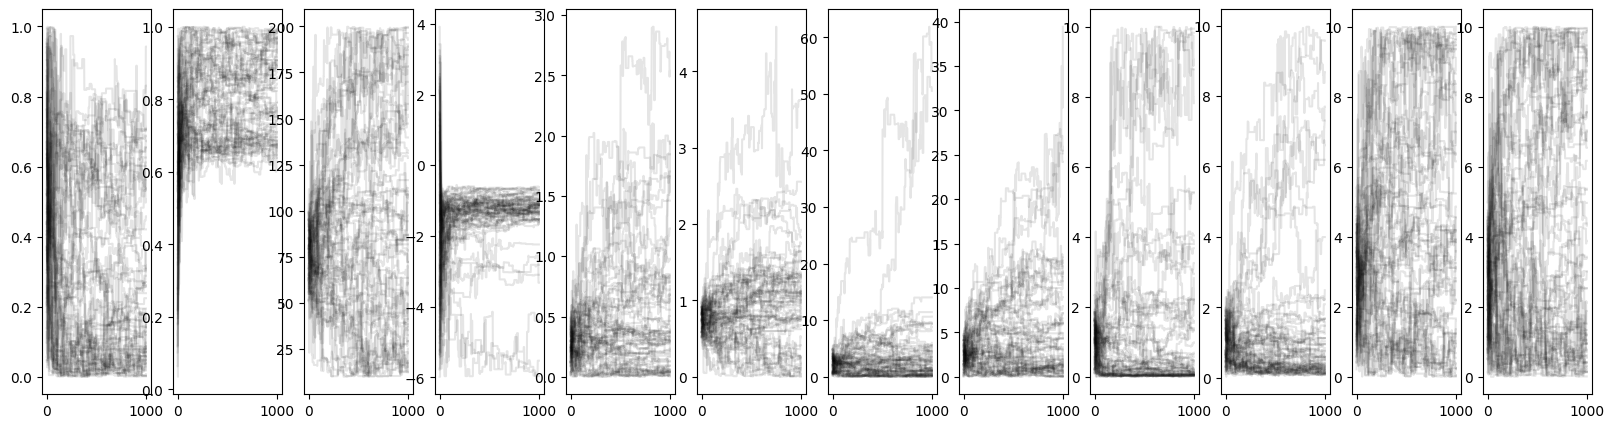

In [7]:
fig,ax = pl.subplots(1,12,figsize=(20,5))
for p_i in range(12):
    for i in range(len(chains)):
        ax[p_i].plot(chains[i,:,p_i],c='k',alpha=0.1)
pl.show()

Burning first 500 steps


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/arviz/data/base.py:221: UserWarning: More chains (500) than draws (40). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


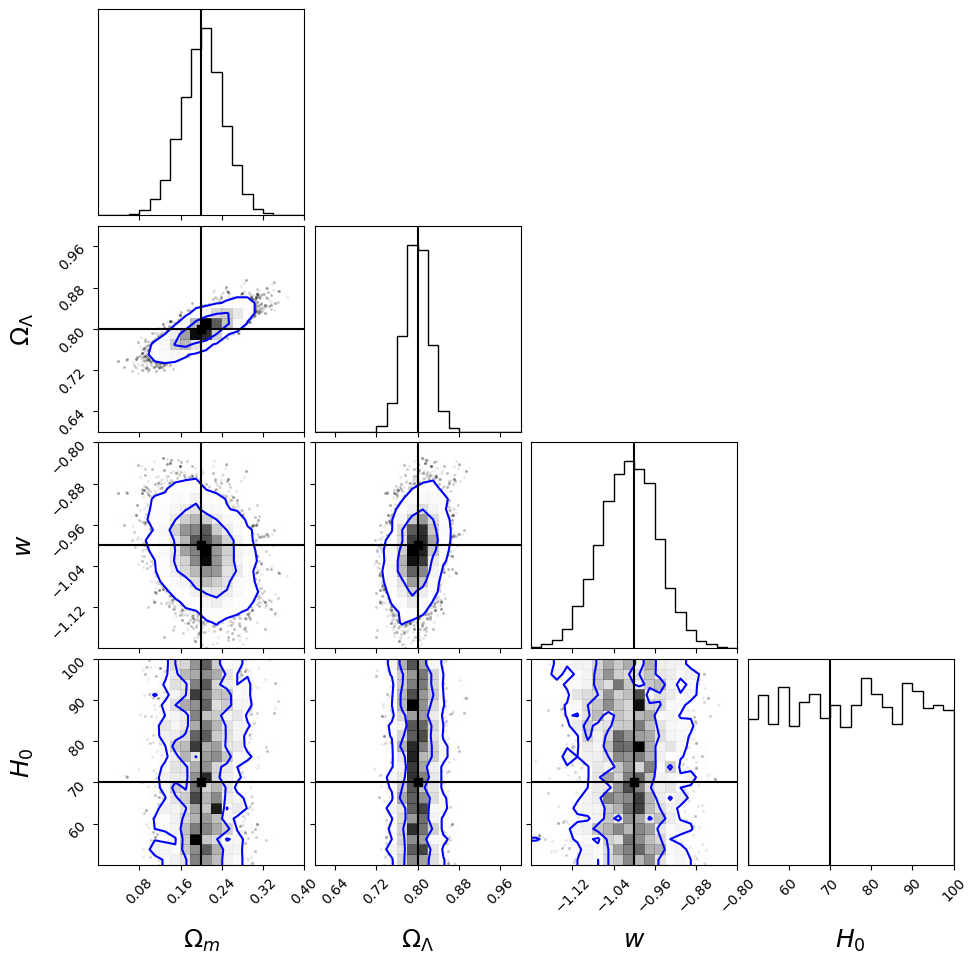

In [ ]:
N_steps = len(chains[0,:,0])
burnin = int(0.5*N_steps)
print(f'Burning first {burnin} steps')
#nb_mcmc_file = 'chains/mcmc_chain_nobias.txt'
#bi_mcmc_file = 'chains/mcmc_chain_bias_muo.txt'
#zb_mcmc_file = 'chains/mcmc_chain_zBEAMS.txt'

#om_nb,H0_nb,w_nb = np.loadtxt(nb_mcmc_file, usecols=[0,1,2],unpack=True)
#om_bi,H0_bi,w_bi = np.loadtxt(bi_mcmc_file, usecols=[0,1,2],unpack=True)
#om_zb,H0_zb,w_zb = np.loadtxt(zb_mcmc_file, usecols=[0,1,2],unpack=True)
om_bi = chains[:,burnin:,0]
Ode_bi = chains[:,burnin:,1]
H0_bi = chains[:,burnin:,2]
w_bi =  chains[:,burnin:,3]

X_param = 'o_m'
Y_param = 'H0'
X_fid = {'o_m':Om_fid,'H0':H0_fid,'Ode':Ode_fid,'w':w_fid}[X_param]
Y_fid = {'o_m':Om_fid,'H0':H0_fid,'Ode':Ode_fid,'w':w_fid}[Y_param]
X_corner = {'o_m':om_bi,'H0':H0_bi,'Ode':Ode_bi,'w':w_bi}[X_param]
Y_corner = {'o_m':om_bi,'H0':H0_bi,'Ode':Ode_bi,'w':w_bi}[Y_param]

fig = plt.figure(figsize=(10,10))
corner.corner(np.array([om_bi,Ode_bi,w_bi,H0_bi]).T,
                truths = [Om_fid,Ode_fid,w_fid,H0_fid],
                truth_color='k',
                contour_kwargs = {'colors':'blue'},
                labels = ['$\Omega_m$','$\Omega_\Lambda$','$w$','$H_0$'],
                label_kwargs={'fontsize':18},
                range = [(0.0,0.4),(0.6,1.0),(-1.2,-0.8),(50,100)],
                bins=20,
                #fill_contours=True,
                #contourf_kwargs = {'alpha':0.5},
                levels=[0.68,0.95],fig=fig)

plt.show()